<a href="https://colab.research.google.com/github/36ova/36ova/blob/master/task6/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 30 балла


In [ ]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.



*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. Формулами мат. ожидания и дисперсии с занятия пользоваться нельзя, но стоит сверить ответ.
2. **Прочитай требования к формату решения в правилах сдачи задания.**

<div>
<img src="https://drive.google.com/uc?id=1A5YhJ-NQ8_1mIfT67nP1ru380J0x93Y5" width="500"/>
</div>

<div>
<img src="https://drive.google.com/uc?id=1SzmfRkK_J1QVRaKs4qQFg6b39OjU4HR6" width="500"/>
</div>

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [ ]:
data = pd.read_csv('day.csv')
data = data.drop(columns=['instant', 'dteday', 'yr', 'casual', 'registered'])
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
train, test = train_test_split(data, test_size=0.2)
train.shape, test.shape

((584, 11), (147, 11))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. 

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [ ]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


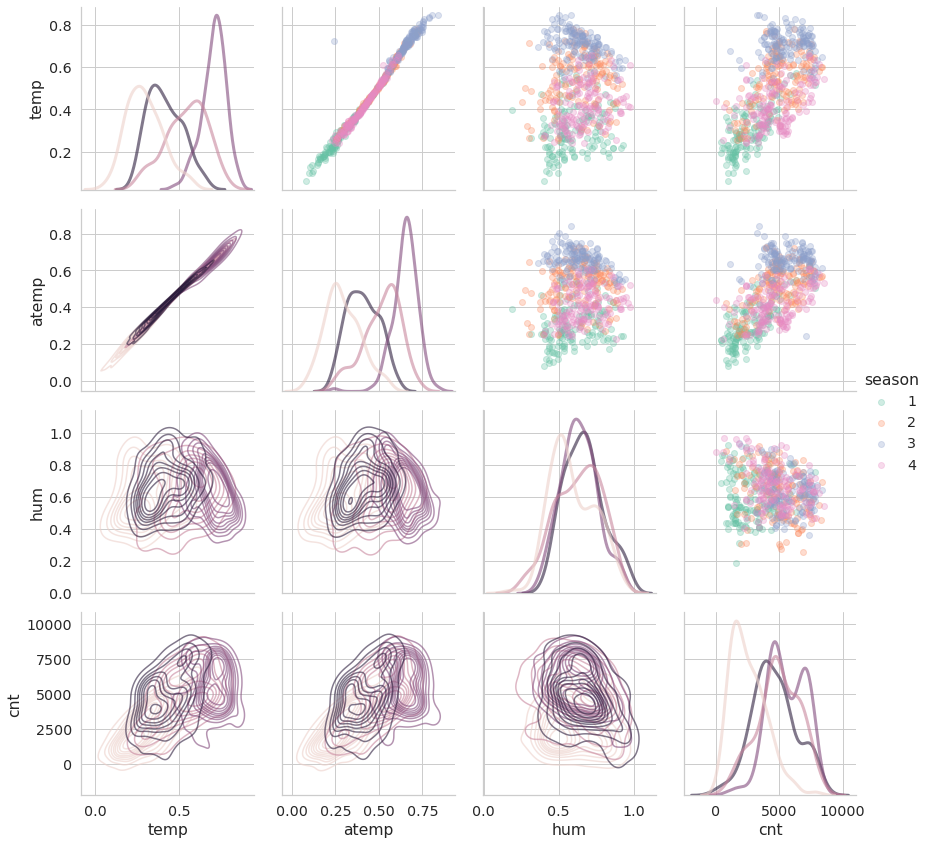

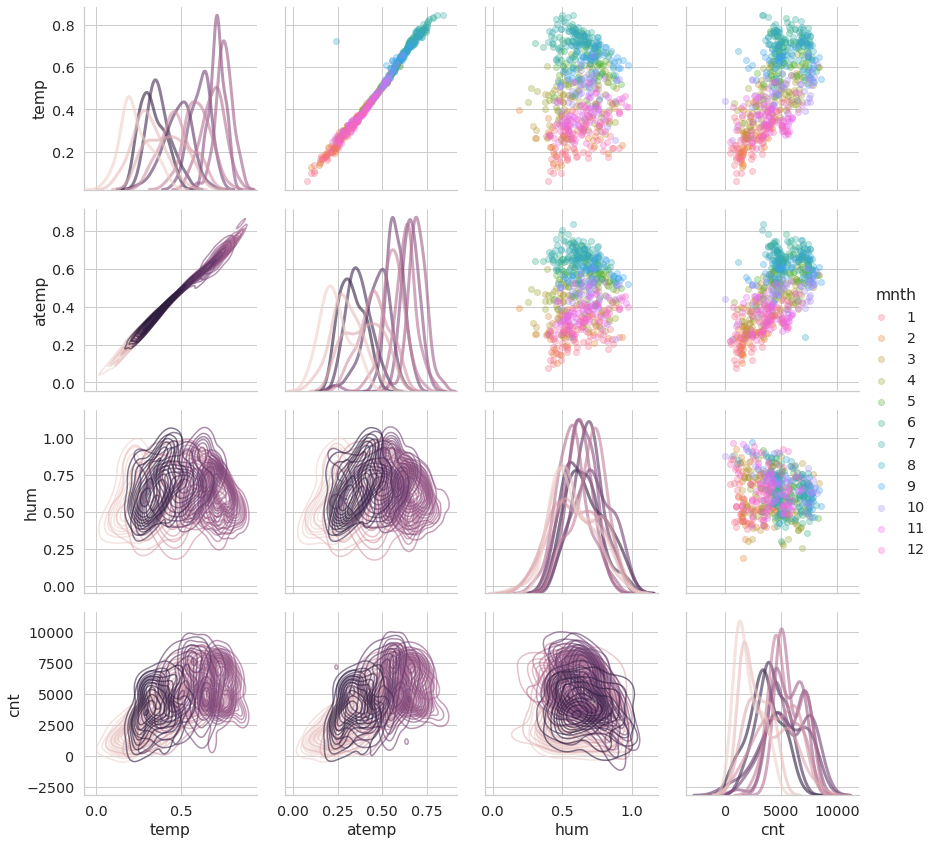

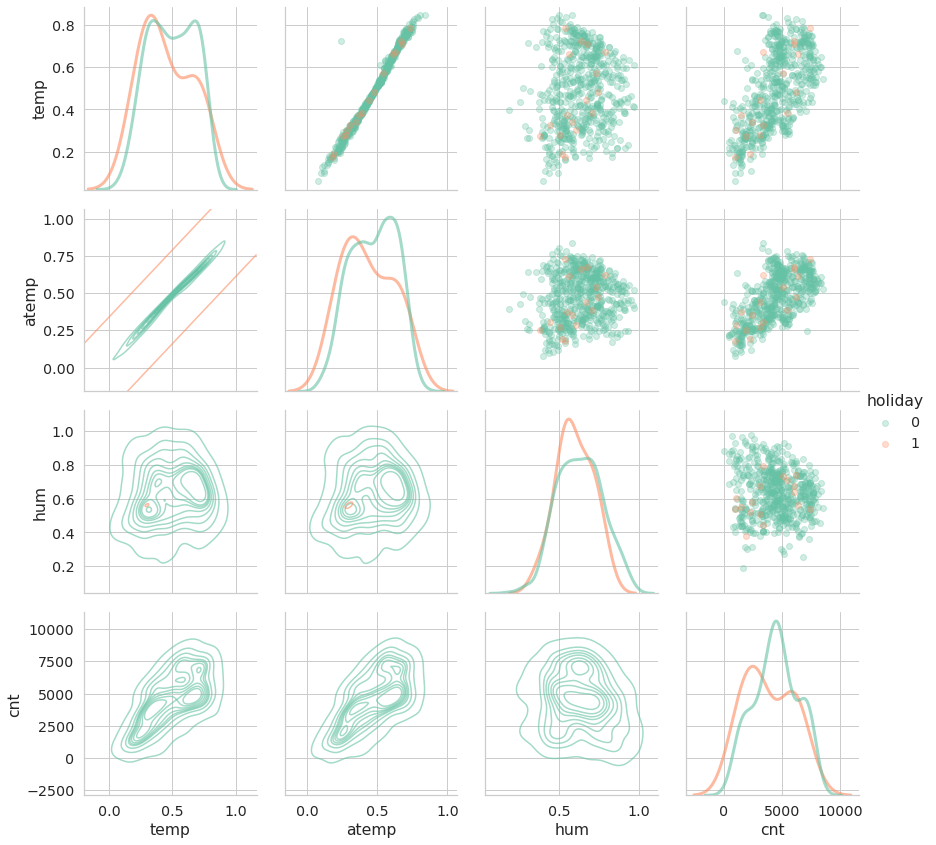

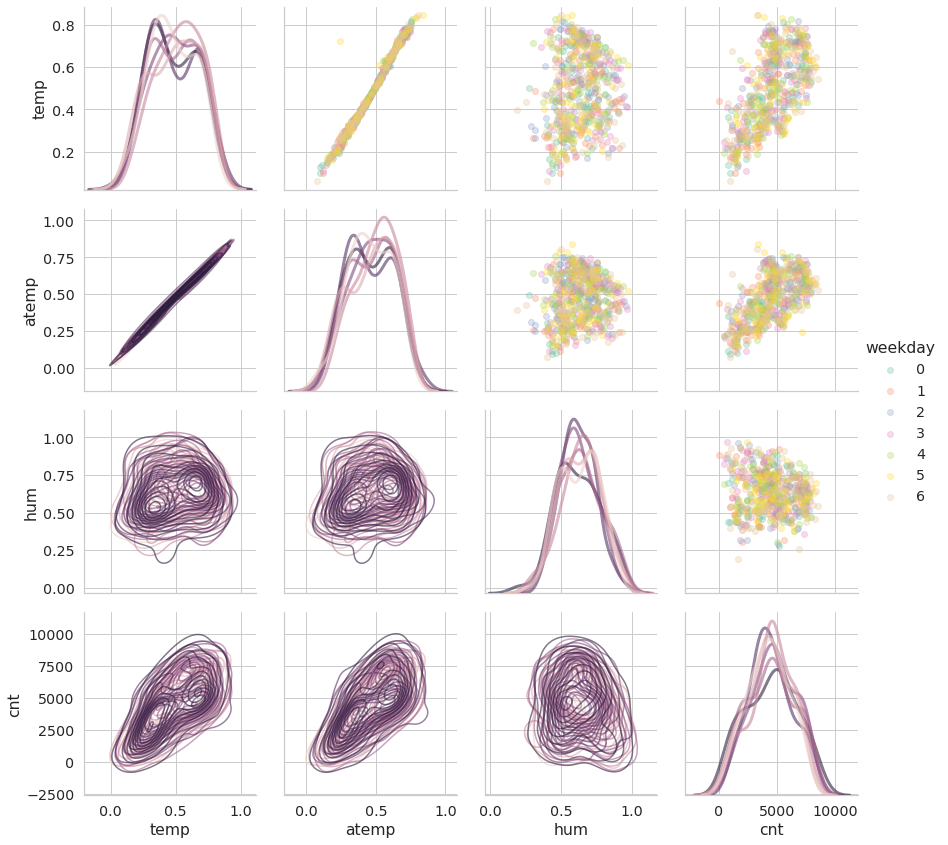

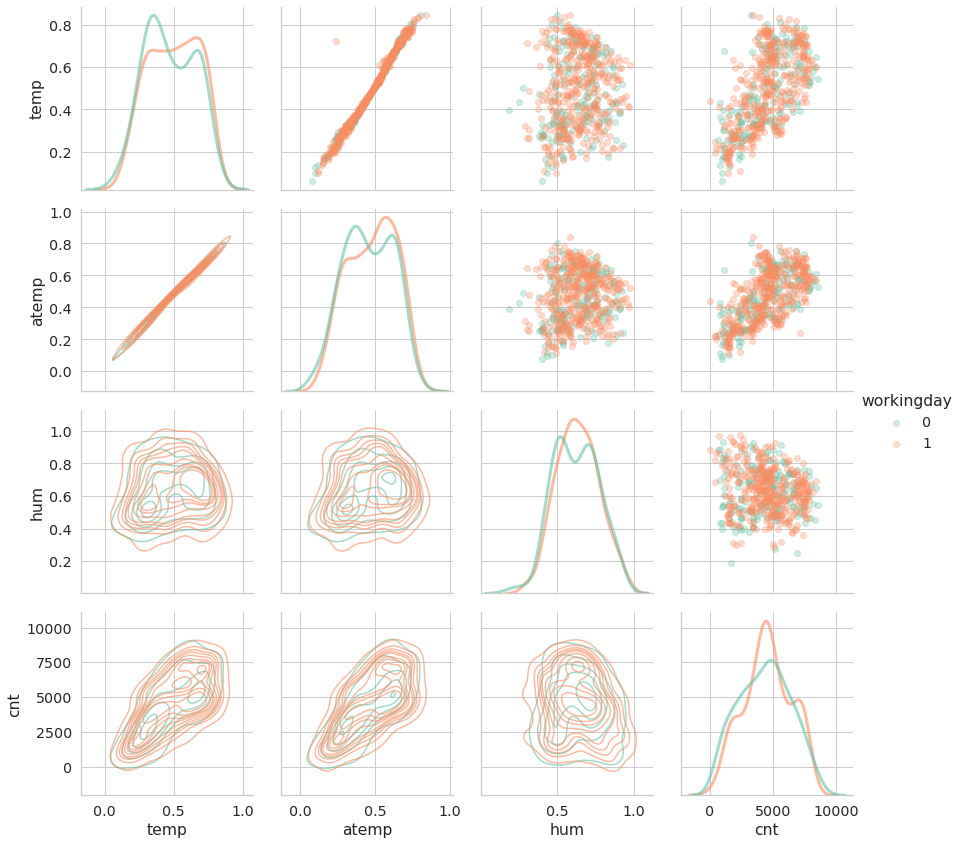

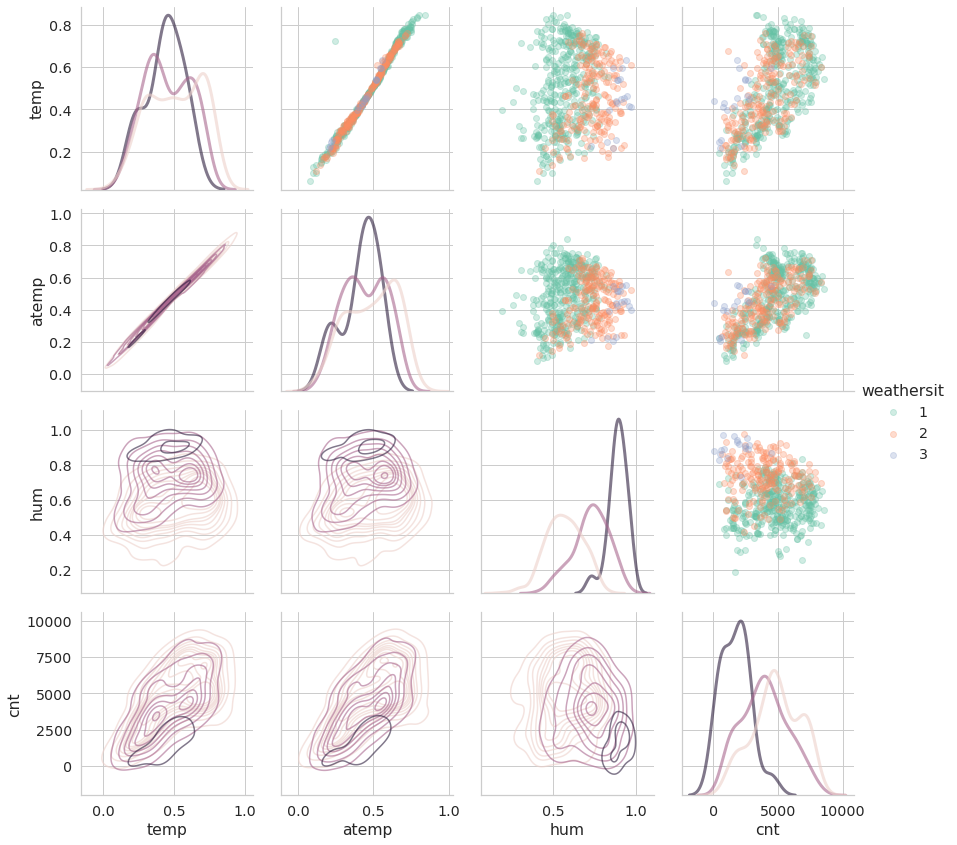

In [ ]:
for hue in categorial_features:
    g = sns.PairGrid(train[['temp', 'atemp', 'hum', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** <br>
Больше всего велосипедов берут в приятную погоду, в конце лета - начале осени. <br>
1) Выбросы есть. <br>
2) Видно, что признаки "temp" и "atemp" коррелируют между собой: есть явная линейная зависимость между ними. Еще, возможно, стоит рассмотреть параболу в качестве зависимости между "cnt" и "temp". 

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**1.** Удалим выбросы: установим нижнюю и верхнюю границу для каждого из вещественных признаков, для этого посчитаем первый и третий квартиль и умножим на 1.5. <br>
**2.** Удалим пустые (NA) значения. <br>
**3.** С помощью One Hot Encoding закодируем категориальные признаки - теперь они бинарные. 

Реализуйте данную процедуру.

In [ ]:
for feature in real_features:
    for x in [feature]:
        q75,q25 = np.percentile(train.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        train.loc[train[x] < min,x] = np.nan
        train.loc[train[x] > max,x] = np.nan

In [ ]:
train = train.dropna(axis = 0)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
encoder.categories_

[array([1, 2, 3, 4]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3])]

In [ ]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(575, 28)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов.

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression()

In [ ]:
model.coef_

array([ 7.04299825e+03,  3.17272671e+02, -3.57010304e+03, -3.80032941e+03,
        7.68185447e+02,  4.67243680e+02,  1.20496627e+03,  1.84324801e+02,
        2.86024647e+02,  1.07442060e+02, -7.51694643e+01, -3.93529421e+02,
       -8.95254204e+02, -4.09539458e+02,  5.30080226e+02,  4.63524891e+02,
        1.09193182e+00,  1.86243470e+02, -2.10943623e+17,  2.10943623e+17,
        2.10943623e+17,  2.10943623e+17,  2.10943623e+17,  2.10943623e+17,
        5.59248051e+02, -2.10943623e+17, -4.71902790e+01, -1.66624011e+03])

In [ ]:
model.intercept_

3029.9371400288405

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Сначала уберем выбросы из тестовой выборки:

In [ ]:
for feature in real_features:
    for x in [feature]:
        q75,q25 = np.percentile(test.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        test.loc[test[x] < min,x] = np.nan
        test.loc[test[x] > max,x] = np.nan

In [ ]:
test = test.dropna(axis = 0)

In [ ]:
test.shape

(142, 11)

Преобразуем тестовые данные и сделаем предсказание:

In [ ]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
# RMSE
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1376.6303559666353

In [ ]:
# MAE
metrics.mean_absolute_error(test[target_feature], test_preds)

1220.2643991597838

In [ ]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], test_preds)

33.0444402845811

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [ ]:
X = np.hstack([np.array([np.ones(X_train.shape[0])]).T, X_train])
X.shape

(575, 29)

In [ ]:
prod = X.T @ X
np.linalg.matrix_rank(prod) # ранг матрицы не максимаален. 

28

In [ ]:
calculated_coefs = (inv(prod)) @ (X.T @ train[target_feature])
calculated_coefs

array([-3.78684918e+04, -2.43093255e+06,  2.48624350e+06, -1.89579968e+04,
        1.71821552e+05,  1.30439708e+04,  4.68698343e+04,  1.05870696e+04,
        2.40992984e+03,  1.77971979e+04,  1.43566641e+04,  5.39559028e+04,
        8.69518298e+04,  7.33173171e+04,  8.10732365e+04,  6.54665793e+04,
        1.24583044e+04,  3.07652629e+03,  2.01822076e+03,  2.49369324e+04,
       -1.67307782e+04,  1.19071112e+04, -4.58553027e+03, -1.67594099e+04,
        3.79372784e+03,  3.46566195e+02,  3.10613346e+02, -8.33777613e+01,
       -1.70177387e+03])

**Ответ:** Матрица $X^TX$ оказалась близкой к вырожденной: ее ранг 28, т.е. не максимален. Из-за этого коэффициенты вышли очень большими. Дело в том, что признак "weekday" линейно зависит от признаков "holiday" и "workingday", также зависимы признаки "temp" и "atemp", "mnth" и "season". Давайте удалим признаки "weekday", "temp", "mnth" из данных. 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Посчитаем коэффициенты из формулы:

In [ ]:
new_categorial_features = ['season', 'workingday', 'holiday', 'weathersit']
new_real_features = ['atemp', 'hum', 'windspeed']

new_train_cat = encoder.fit_transform(train[new_categorial_features])

new_X_train = np.hstack([train[new_real_features], new_train_cat])
X_train_ones = np.hstack([np.array([np.ones(new_X_train.shape[0])]).T, new_X_train])
X_train_ones.shape

(575, 11)

In [ ]:
prod = X_train_ones.T @ X_train_ones
np.linalg.matrix_rank(prod) # ранг максимален

11

In [ ]:
new_calculated_coefs = (inv(prod)) @ (X_train_ones.T @ train[target_feature])
new_calculated_coefs

array([ 3095.34640829,  7213.19840627, -3175.64816492, -3183.99828129,
         792.35499652,   409.14147448,  1391.60523441,    25.82902985,
        -493.3851471 ,   -60.26106787, -1642.05836894])

Снова обучим модель на данных без столбца "weekday":

In [ ]:
new_model = LinearRegression(fit_intercept=False)
new_model.fit(X_train_ones, train[target_feature])

LinearRegression(fit_intercept=False)

In [ ]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
new_test_cat = encoder.transform(test[new_categorial_features])

# Соединяем данные
new_X_test = np.hstack([test[new_real_features], new_test_cat])
X_test_ones = np.hstack([np.array([np.ones(new_X_test.shape[0])]).T, new_X_test])

In [ ]:
new_test_preds = new_model.predict(X_test_ones)

In [ ]:
# RMSE
metrics.mean_squared_error(test[target_feature], new_test_preds) ** 0.5

1379.8009490431218

In [ ]:
# MAE
metrics.mean_absolute_error(test[target_feature], new_test_preds)

1213.3267923055953

In [ ]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], new_test_preds)

32.633281251744975

**Вывод.** Ошибка предсказания совсем немного уменьшилась после удаления столбцов. Коэффициенты по модулю тоже уменьшились. В итоге ошибка ~33%. 

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

<div>
<img src="https://drive.google.com/uc?id=1wD-lJwk-5UgumNgezlu09FRKs-8Z2SfR" width="600"/>
</div>
Проблема обратимости матрицы действительно решена, теперь т.к. $λ > 0$ инвертируемая матрица никогда не вырождена. 


**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как получается батч.

<div>
<img src="https://drive.google.com/uc?id=1_BRt9EpKvJDHsx47T8L-gwGiRDsKoYoB" width="600"/>
</div>

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

**Ответ:** В Ridge-регрессии добавляется слагаемое-"штраф" за большие коэффициенты $\theta$. Таким образом, коэффициенты сжимаются друг к другу и к нулю. Если данные не были стандартизированы, то вклад разных признаков будет разным. Так как штраф - это сумма квадратов всех коэффициентов, общий штраф посчитается нечестно.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.


Для начала реализуйте класс для работы с моделью ridge-регрессии. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [ ]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        self.lambd = lambd
        self.fit_intercept = fit_intercept

        
    def fit(self, X, Y):
        n, d = X.shape
      
        if (self.fit_intercept):
            X = np.hstack([np.array([np.ones(n)]).T, X])
            d += 1

        self.W = inv((X.T).dot(X) + self.lambd * np.eye(d)).dot((X.T).dot(Y))

        return self
    
    
    def predict(self, X):
        n = X.shape[0]
        if (self.fit_intercept):
            X = np.hstack([np.array([np.ones(n)]).T, X])

        predictions = X.dot(self.W)
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

In [ ]:
categorial_features = ['mnth', 'workingday', 'holiday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']
target_feature = 'cnt'
columns = categorial_features + real_features + [target_feature]

In [ ]:
data = data[columns]

In [ ]:
scaler = StandardScaler()

scaler.fit(data)
data = pd.DataFrame(scaler.fit_transform(data), columns=columns) # стандардизация StandardScaler

In [ ]:
train, test = train_test_split(data, test_size=0.4)
val, test = train_test_split(test, test_size=0.5)
train.shape, val.shape, test.shape

((438, 8), (146, 8), (147, 8))

Выполните необходимые преобразования признаков. Не забудьте, что обучить преобразования нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее.

In [ ]:
def drop_outliers(data_chunk):
    for feature in real_features:
        for x in [feature]:
            q75,q25 = np.percentile(data_chunk.loc[:,x],[75,25])
            intr_qr = q75-q25

            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)

            data_chunk.loc[data_chunk[x] < min,x] = np.nan
            data_chunk.loc[data_chunk[x] > max,x] = np.nan
    
drop_outliers(train)
drop_outliers(val)
drop_outliers(test)

In [ ]:
train = train.dropna(axis = 0)
val = val.dropna(axis=0)
test = test.dropna(axis=0)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])
val_cat = encoder.fit_transform(val[categorial_features])

X_train = np.hstack([train[real_features], train_cat])
X_val = np.hstack([val[real_features], val_cat])
X_train.shape, X_val.shape

((431, 18), (140, 18))

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / np.abs(y_true)).mean()

In [ ]:
train_RMSEs, train_MAEs, train_MAPEs = [], [], []
val_RMSEs, val_MAEs, val_MAPEs = [], [], []
train_coefs = []

lambda_grid = np.geomspace(1e-4, 1e5, 500)

for lambd_value in lambda_grid:
    model = RidgeRegression(fit_intercept=True, lambd=lambd_value)
    model.fit(X_train, train[target_feature])

    train_preds = model.predict(X_train)
    train_RMSEs.append(metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5)
    train_MAEs.append(metrics.mean_absolute_error(train[target_feature], train_preds))
    train_MAPEs.append(mean_absolute_percentage_error(train[target_feature], train_preds))

    val_preds = model.predict(X_val)
    val_RMSEs.append(metrics.mean_squared_error(val[target_feature], val_preds) ** 0.5)
    val_MAEs.append(metrics.mean_absolute_error(val[target_feature], val_preds))
    val_MAPEs.append(mean_absolute_percentage_error(val[target_feature], val_preds))

    train_coefs.append(model.W)

In [ ]:
lambda_grid[np.argmin(val_MAPEs)]

808.7524908770457

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. 

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

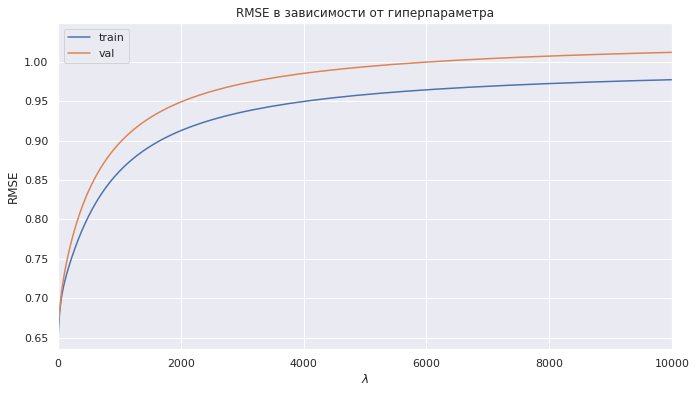

In [ ]:
sns.set_theme()
plt.figure(figsize=(11, 6))
sns.lineplot(x=lambda_grid, y=train_RMSEs, label="train")
sns.lineplot(x=lambda_grid, y=val_RMSEs, label="val")
plt.xlim((-1, 1e4))
plt.xlabel(r'$\lambda$')
plt.ylabel('RMSE')

plt.legend()
plt.title("RMSE в зависимости от гиперпараметра")
plt.show()

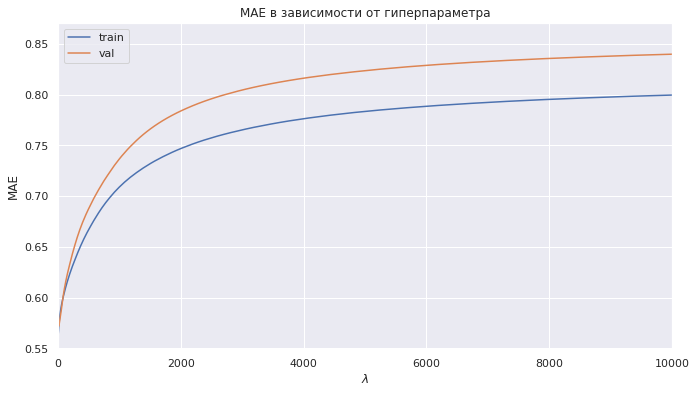

In [ ]:
plt.figure(figsize=(11, 6))
sns.lineplot(x=lambda_grid, y=train_MAEs, label="train")
sns.lineplot(x=lambda_grid, y=val_MAEs, label="val")
plt.xlim((-1, 1e4))
plt.xlabel(r'$\lambda$')
plt.ylabel('MAE')

plt.legend()
plt.title("MAE в зависимости от гиперпараметра")
plt.show()

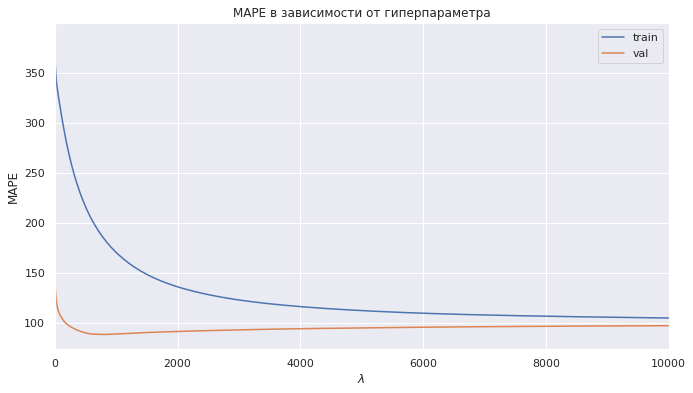

In [ ]:
plt.figure(figsize=(11, 6))
sns.lineplot(x=lambda_grid, y=train_MAPEs, label="train")
sns.lineplot(x=lambda_grid, y=val_MAPEs, label="val")
plt.xlim((-1, 1e4))
plt.xlabel(r'$\lambda$')
plt.ylabel('MAPE')

plt.legend()
plt.title("MAPE в зависимости от гиперпараметра")
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Для наглядности можно попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [ ]:
feature_coefs = np.array(train_coefs).T

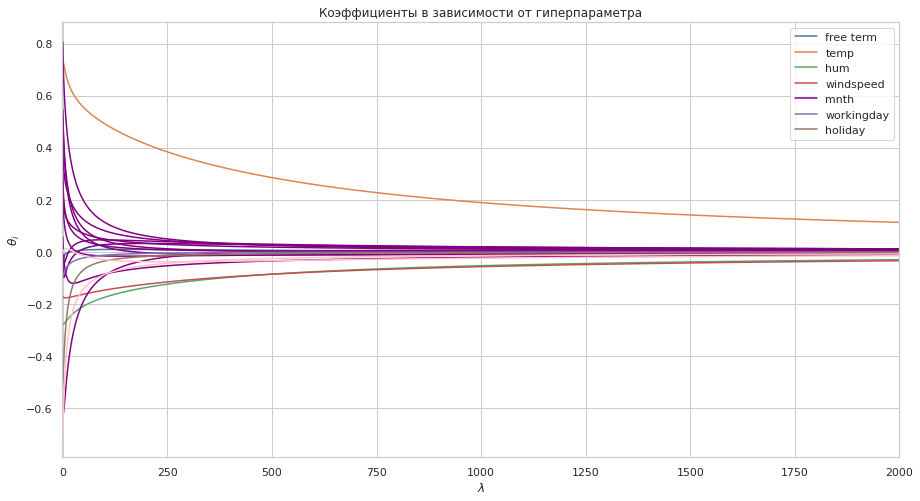

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.lineplot(x=lambda_grid, y=feature_coefs[0], label="free term")
sns.lineplot(x=lambda_grid, y=feature_coefs[1], label="temp")
sns.lineplot(x=lambda_grid, y=feature_coefs[2], label="hum")
sns.lineplot(x=lambda_grid, y=feature_coefs[3], label="windspeed")
for i in range(4, 15):
    sns.lineplot(x=lambda_grid, y=feature_coefs[i], color='purple', label="mnth" if i == 4 else "")
sns.lineplot(x=lambda_grid, y=feature_coefs[15], label="workingday")
sns.lineplot(x=lambda_grid, y=feature_coefs[16], label="holiday")
for i in range(17, 19):
    sns.lineplot(x=lambda_grid, y=feature_coefs[i], color='pink', label="weathersit" if i == 16 else "")

plt.xlim((-1, 2e3))
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\theta_i$')    
plt.title("Коэффициенты в зависимости от гиперпараметра")
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [ ]:
lambd = lambda_grid[np.argmin(val_MAPEs)]
lambd

808.7524908770457

In [ ]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

model = RidgeRegression(fit_intercept=True, lambd=lambd)
model.fit(X_train, train[target_feature])

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
# RMSE
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

0.8161304085537181

In [ ]:
# MAE
metrics.mean_absolute_error(test[target_feature], test_preds)

0.6609450908779636

In [ ]:
#MAPE
mean_absolute_percentage_error(test[target_feature], test_preds)

135.1674638190442

**Выводы:**
*   Среднее значение ошибки увеличилось по сравнению с обычной линейной регрессией.
*   Подходящее значение лямбда - 808.75
*   Чем больше $λ$, тем ближе коэффициенты друг к другу и к нулю. Это происходит, потому что RidgeRegression накладывает штраф на большие по модулю коэффициенты в значение ошибки. Однако на графике выделяется признак "temp", видимо он оказывает сильное влияние на результат, раз после стандартизации медленнее всех стремится к нулю. Также выделяются признаки скорости ветра и влажности воздуха.



### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.


Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [ ]:
import random

Реализуйте процедуру mini-batch стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча обычно берут кратно степени двойки, например, 128 или 256.

In [ ]:
def batch_generator(X, y, batch_size=128, num_batches=20):
    num_samples = len(X)

    X_batches = []
    y_batches = []

    for i in range(num_batches):
        perm = random.sample(range(1, num_samples), batch_size)
        yield np.array([np.array(X)[i] for i in perm]), np.array([np.array(y)[i] for i in perm])

In [ ]:
y_train = train[target_feature]
y_val = val[target_feature]
y_test = test[target_feature]

In [ ]:
def loss_fn(Y_pred, Y_right):
    rmse = metrics.mean_squared_error(Y_pred, Y_right) ** 0.5
    mae = metrics.mean_absolute_error(Y_pred, Y_right)
    mape = mean_absolute_percentage_error(Y_pred, Y_right)
    return [rmse, mae, mape]

In [ ]:
class RidgeRegression() :
    def __init__( self, learning_rate, iterations, lambd, fit_intercept) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit( self, X, Y, X_val, Y_val, k=128) :
        n, d = X.shape

        if (self.fit_intercept):
            X = np.hstack([np.array([np.ones(n)]).T, X])
            X_val = np.hstack([np.array([np.ones(X_val.shape[0])]).T, X_val])
            d += 1
        
        self.W = np.zeros(d)

        batch_gen = batch_generator(X_train, y_train, k, self.iterations)
        self.train_losses = []
        self.val_losses = []
                  
        for i in range(self.iterations) :
            X_batch, y_batch = next(batch_gen)

            if (self.fit_intercept):
                X_batch = np.hstack([np.array([np.ones(k)]).T, X_batch])

            y_pred = model.predict(X_batch)
            loss = loss_fn(y_pred, y_batch)
            self.train_losses.append(loss)

            y_pred_val = model.predict(X_val)
            loss = loss_fn(y_pred_val, y_val)
            self.val_losses.append(loss)

            sum_dW = 0
            for i in range(k):
                sum_dW += ( - ( X_batch[i].T ).dot( y_batch[i] - y_pred[i]) * (n / k) + ( self.lambd * self.W ) )
            
            self.W = self.W - self.learning_rate * sum_dW     
        return self

    def predict( self, X ) :
        return X.dot( self.W )

In [ ]:
model = RidgeRegression(learning_rate=1e-5, iterations=300, lambd=1, fit_intercept=True)
model.fit(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
train_RMSEs, train_MAEs, train_MAPEs = np.array(model.train_losses).T
val_RMSEs, val_MAEs, val_MAPEs = np.array(model.val_losses).T

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить? 300 итераций будет достаточно. 

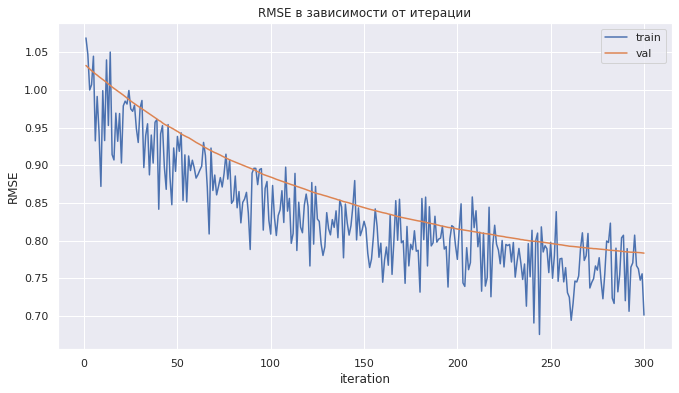

In [ ]:
sns.set_theme()
plt.figure(figsize=(11, 6))

x_vals = np.arange(1, val_RMSEs.shape[0] + 1)
sns.lineplot(x=x_vals, y=train_RMSEs, label="train")
sns.lineplot(x=x_vals, y=val_RMSEs, label="val")
plt.xlabel('iteration')
plt.ylabel('RMSE')

plt.legend()
plt.title("RMSE в зависимости от итерации")
plt.show()

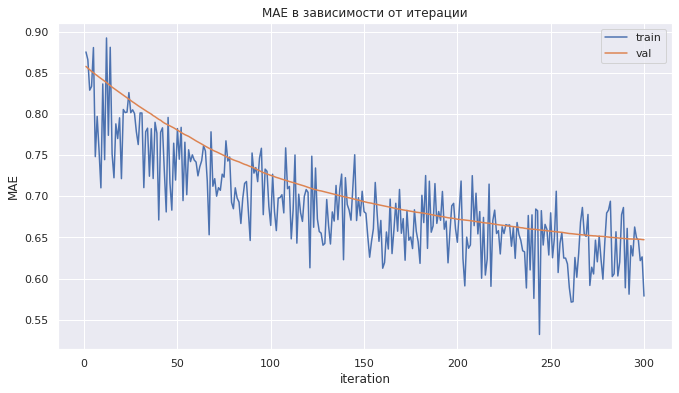

In [ ]:
plt.figure(figsize=(11, 6))

sns.lineplot(x=x_vals, y=train_MAEs, label="train")
sns.lineplot(x=x_vals, y=val_MAEs, label="val")
plt.xlabel('iteration')
plt.ylabel('MAE')

plt.legend()
plt.title("MAE в зависимости от итерации")
plt.show()

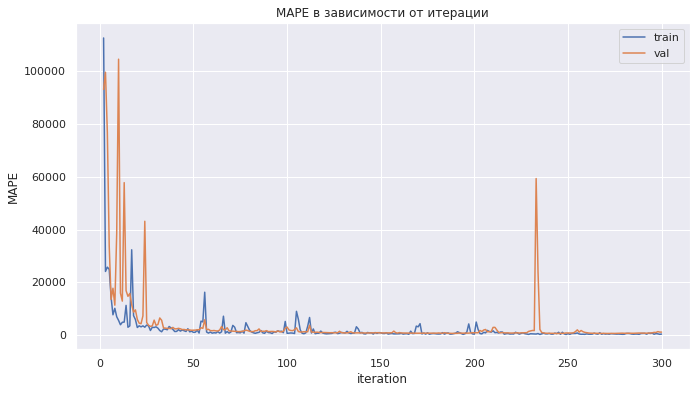

In [ ]:
plt.figure(figsize=(11, 6))

sns.lineplot(x=x_vals, y=train_MAPEs, label="train")
sns.lineplot(x=x_vals, y=val_MAPEs, label="val")
plt.xlabel('iteration')
plt.ylabel('MAPE')

plt.legend()
plt.title("MAPE в зависимости от итерации")
plt.show()

Посчитайте ошибку на тестовой выборке.

In [ ]:
X_test_ones = np.hstack([np.array([np.ones(X_test.shape[0])]).T, X_test])
test_preds = model.predict(X_test_ones)

In [ ]:
loss_fn(test_preds, y_test)

[0.753439173255169, 0.6213342650237721, 499.87924290891925]

**Выводы:** Метрики MSE и MAE заметно улучшаются по графику, и в принципе неплохие на тестовой выборке. Значение MAPE на тестовой выборке получилось довольно большим. Скорее всего, это можно исправить, подобрав более подходящие learning rate или значение lamda. 